In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
k = 0.10023 # meter constant
deltar = 3.95 # change in height between floors
mearth = 5.972e24 # mass of the earth
G = 6.67e-11 # gravitational constant
rearth = 6.371009e6 # reference value for earth

In [4]:
def rad(dg):
    return abs(-2 * deltar * G * mearth / dg) ** (1/3)

In [5]:
data['deltag'] = data.value * k * 1e-5

In [6]:
data = data[:38]
data.floor = data.floor.astype(int)
data = data[data.floor <= 13]
data = data.reset_index().iloc[:,1:]
data['day'] = 0
data['day'][:12] = 1
data['day'][12:24] = 2
data['day'][24:] = 3

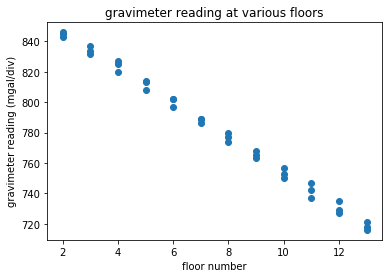

In [7]:
plt.scatter(data.floor, data.value)
plt.xlabel('floor number')
plt.ylabel('gravimeter reading (mgal/div)')
plt.title('gravimeter reading at various floors')
plt.savefig('radiusdata.png')

In [8]:
def f(x, m, b): # ((-2g/R) * dg + offset)
    return m*x + b

In [9]:
popt, pcov = curve_fit(f, range(2, 14), data.groupby('floor').mean().deltag, sigma=data.groupby('floor').std().deltag, absolute_sigma=True)

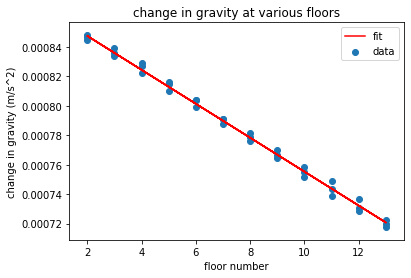

In [10]:
plt.tight_layout()
plt.plot(data.floor, f(data.floor, *popt), c='r', label='fit')
plt.scatter(data.floor, data.deltag, label='data')
plt.legend()
plt.xlabel('floor number')
plt.ylabel('change in gravity (m/s^2)')
plt.title('change in gravity at various floors')
plt.savefig('fitted.png')

In [11]:
pred = rad(popt[0])
print(f'{pred:.2E}')

6.49E+06


In [12]:
err = (pred - rearth)
print(f'{err:.1E}')

1.2E+05


In [13]:
uncertainty = np.sqrt(np.diag(pcov))[0] / popt[0] * pred
print(f'{uncertainty:.1E}')

-1.2E+05


In [14]:
# reduced chi squared
def rcs(pred, target, uncertainty, n_params):
    return np.square((pred - target) / uncertainty).sum() / (pred.size - n_params)

In [15]:
rcs(f(data.floor, *popt), data.groupby('floor').mean().deltag, data.groupby('floor').std().deltag, 2)

109.57819477749827

Text(0.5, 1.0, 'difference between data from third and first days of data collection')

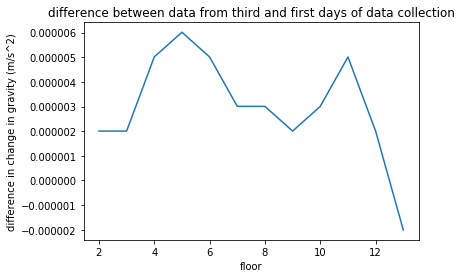

In [16]:
plt.plot(data[data.day == 1].floor, data[data.day == 3].deltag.values - data[data.day == 1].deltag.values)
plt.xlabel('floor')
plt.ylabel('difference in change in gravity (m/s^2)')
plt.title('difference between data from third and first days of data collection')

Text(0.5, 1.0, 'difference between data from third and second days of data collection')

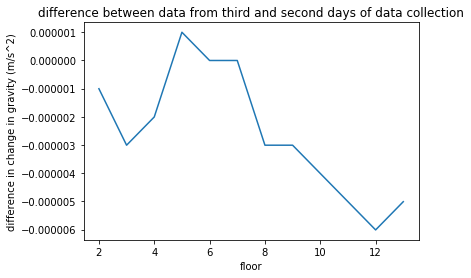

In [17]:
plt.plot(data[data.day == 1].floor, data[data.day == 3].deltag.values - data[data.day == 2].deltag.values)
plt.xlabel('floor')
plt.ylabel('difference in change in gravity (m/s^2)')
plt.title('difference between data from third and second days of data collection')

Text(0.5, 1.0, 'difference between data from second and first days of data collection')

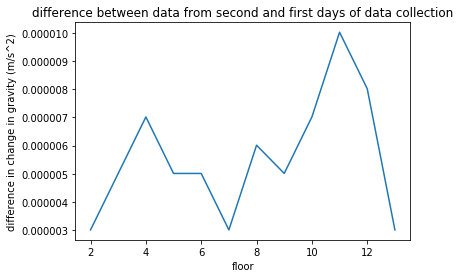

In [18]:
plt.plot(data[data.day == 1].floor, data[data.day == 2].deltag.values - data[data.day == 1].deltag.values)
plt.xlabel('floor')
plt.ylabel('difference in change in gravity (m/s^2)')
plt.title('difference between data from second and first days of data collection')